Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

 Description of fnlwgt (final weight)


 The weights on the CPS files are controlled to independent estimates of the
 civilian noninstitutional population of the US.  These are prepared monthly
 for us by Population Division here at the Census Bureau.  We use 3 sets of
 controls.

  These are:
          1.  A single cell estimate of the population 16+ for each state.
          2.  Controls for Hispanic Origin by age and sex.
          3.  Controls by Race, age and sex.

 We use all three sets of controls in our weighting program and "rake" through
 them 6 times so that by the end we come back to all the controls we used.

 The term estimate refers to population totals derived from CPS by creating
 "weighted tallies" of any specified socio-economic characteristics of the
 population.

 People with similar demographic characteristics should have
 similar weights.  There is one important caveat to remember
 about this statement.  That is that since the CPS sample is
 actually a collection of 51 state samples, each with its own
 probability of selection, the statement only applies within
 state.

http://archive.ics.uci.edu/ml/machine-learning-databases/adult/

In [1]:
from IPython.display import Markdown, display

import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df1 = pd.read_csv('adult.csv', skipinitialspace = True, na_values = ['?'], names = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 
                                                      'sex', 'capital_gain', 'capital_loss','hours_per_week','native_country', 'income'])

df2 = pd.read_csv('adult_test.csv', skipinitialspace = True, na_values = ['?'], names = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 
                                                      'sex', 'capital_gain', 'capital_loss','hours_per_week','native_country', 'income'])
dframes = [df1,df2]
df = pd.concat(dframes)
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
df.isnull().values.any()

True

<font color='red'> below i am formatting the fnlwgt final weight and orher numerical values.
However this has affected the f1 score with .1% 
Also need to edit the bucketing for final weight
</font> 

In [5]:
#pd.set_option('float_format', '{:f}'.format)

In [6]:
df= df.dropna()
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [7]:
df.isnull().values.any()

False

In [8]:

d = {'Private': 1, 'Self-emp-not-inc': 2, 'Self-emp-inc': 3, 'Federal-gov': 4, 'Local-gov': 5, 'State-gov': 6, 'Without-pay': 7, 'Never-worked': 8}
df['workclass'] = df['workclass'].map(d)

#education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
d = {'Bachelors': 1, 'Some-college': 2, '11th': 3, 'HS-grad': 4, 'Prof-school': 5, 'Assoc-acdm': 6, 'Assoc-voc': 7, '9th': 8, '7th-8th': 9, '12th':10, 'Masters':11, '1st-4th':12, '10th':13 , 'Doctorate': 14, '5th-6th': 15, 'Preschool': 16}
df['education'] = df['education'].map(d)

# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
e = {'Married-civ-spouse': 1, 'Divorced': 2, 'Never-married': 3, 'Separated': 4, 'Widowed': 5, 'Married-spouse-absent': 6,
     'Married-AF-spouse': 7}
df['marital_status'] = df['marital_status'].map(e)

# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, 
# Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
d = {'Tech-support':1, 'Craft-repair':2, 'Other-service':3, 'Sales':4, 'Exec-managerial':5, 'Prof-specialty':6, 'Handlers-cleaners':7, 'Machine-op-inspct':8, 'Adm-clerical':9, 'Farming-fishing':10, 'Transport-moving':11, 'Priv-house-serv':12, 'Protective-serv':13, 'Armed-Forces':14}
df['occupation'] = df['occupation'].map(d)

# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
d = {'Wife': 1, 'Own-child': 2, 'Husband': 3, 'Not-in-family': 4, 'Other-relative': 5, 'Unmarried': 6}
df['relationship'] = df['relationship'].map(d)

# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
d = {'White': 1, 'Asian-Pac-Islander': 2, 'Amer-Indian-Eskimo': 3, 'Other': 4, 'Black': 5}
df['race'] = df['race'].map(d)

# sex: Female, Male.
d = {'Female': 1, 'Male': 2}
df['sex'] = df['sex'].map(d)

# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India,
#     Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, 
# Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, 
# Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
d = {'United-States':1, 'Cambodia':2, 'England':3, 'Puerto-Rico':4, 'Canada':5, 'Germany':6, 'Outlying-US(Guam-USVI-etc)':7, 'India':8,
'Japan':9, 'Greece':10, 'South':11, 'China':12, 'Cuba':13, 'Iran':14, 'Honduras':15, 'Philippines':16, 'Italy':17, 'Poland':18, 
'Jamaica':19, 'Vietnam':20, 'Mexico':21, 'Portugal':22, 
'Ireland':23, 'France':24, 'Dominican-Republic':25, 'Laos':26, 'Ecuador':27, 'Taiwan':28, 'Haiti':29, 'Columbia':30,
     'Hungary':31, 'Guatemala':32, 'Nicaragua':33, 'Scotland':34, 
'Thailand':35, 'Yugoslavia':36, 'El-Salvador':37, 'Trinadad&Tobago':38, 'Peru':39, 'Hong':40, 'Holand-Netherlands':41}
df['native_country'] = df['native_country'].map(d)

d = {'<=50K': -1, '>50K': 1}
df['income'] = df['income'].map(d)

df.head(10)

#since I have all the data converted ie mapped it does not display the data anymore.

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,1,13,3,9,4,1,2,2174,0,40,1,-1.0
1,50,2,83311,1,13,1,5,3,1,2,0,0,13,1,-1.0
2,38,1,215646,4,9,2,7,4,1,2,0,0,40,1,-1.0
3,53,1,234721,3,7,1,7,3,5,2,0,0,40,1,-1.0
4,28,1,338409,1,13,1,6,1,5,1,0,0,40,13,-1.0
5,37,1,284582,11,14,1,5,1,1,1,0,0,40,1,-1.0
6,49,1,160187,8,5,6,3,4,5,1,0,0,16,19,-1.0
7,52,2,209642,4,9,1,5,3,1,2,0,0,45,1,1.0
8,31,1,45781,11,14,3,6,4,1,1,14084,0,50,1,1.0
9,42,1,159449,1,13,1,5,3,1,2,5178,0,40,1,1.0


In [9]:
df.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,45222.000000,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,30162.000000
mean,38.547941,1.742161,1.897347e+05,4.385963,10.118460,2.056698,5.735483,3.397063,1.445447,1.675048,1101.430344,88.595418,40.938017,2.487174,-0.502155
std,13.217870,1.465582,1.056392e+05,3.438850,2.552881,1.173525,2.981488,1.226719,1.197941,0.468362,7506.430084,404.956092,12.007508,5.588405,0.864792
min,17.000000,1.000000,1.349200e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-1.000000
25%,28.000000,1.000000,1.173882e+05,2.000000,9.000000,1.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,40.000000,1.000000,-1.000000
50%,37.000000,1.000000,1.783160e+05,4.000000,10.000000,2.000000,5.000000,3.000000,1.000000,2.000000,0.000000,0.000000,40.000000,1.000000,-1.000000
75%,47.000000,2.000000,2.379260e+05,5.000000,13.000000,3.000000,8.000000,4.000000,1.000000,2.000000,0.000000,0.000000,45.000000,1.000000,-1.000000
max,90.000000,7.000000,1.490400e+06,16.000000,16.000000,7.000000,14.000000,6.000000,5.000000,2.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


### Changing all the continuous data to discrete

In [10]:
df['capital_gain'] = pd.cut(df['capital_gain'], 5, labels=["1", "2", "3", "4", "5"])

In [11]:
df['fnlwgt'] = pd.cut(df['fnlwgt'], 5, labels=["1", "2", "3", "4", "5"])

In [12]:
df['capital_loss'] = pd.cut(df['capital_loss'], 5, labels=["1", "2", "3", "4", "5"])

In [13]:
df['age'] = pd.cut(df['age'], 10, labels=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"])

In [14]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,4,6,1,1,13,3,9,4,1,2,1,1,40,1,-1.0
1,5,2,1,1,13,1,5,3,1,2,1,1,13,1,-1.0
2,3,1,1,4,9,2,7,4,1,2,1,1,40,1,-1.0
3,5,1,1,3,7,1,7,3,5,2,1,1,40,1,-1.0
4,2,1,2,1,13,1,6,1,5,1,1,1,40,13,-1.0


In [15]:
df.shape

(45222, 15)

In [16]:
df= df.dropna()

convert the Pandas dataframes into numpy arrays that can be used by scikit_learn

In [17]:

all_features = df[['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 
                                                      'sex', 'capital_gain', 'capital_loss','hours_per_week','native_country']].values


all_classes = df['income'].values

feature_names = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 
                                                      'sex', 'capital_gain', 'capital_loss','hours_per_week','native_country']

all_features

array([['4', 6, '1', ..., '1', 40, 1],
       ['5', 2, '1', ..., '1', 13, 1],
       ['3', 1, '1', ..., '1', 40, 1],
       ...,
       ['6', 1, '1', ..., '1', 40, 1],
       ['1', 1, '1', ..., '1', 20, 1],
       ['5', 3, '1', ..., '1', 40, 1]], dtype=object)

In [18]:
#Some of our models require the input data to be normalized


from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.30731813,  2.91624496, -0.36609851, ..., -0.21117066,
        -0.07773411, -0.26867354],
       [ 0.86163755,  0.18004984, -0.36609851, ..., -0.21117066,
        -2.3315307 , -0.26867354],
       [-0.24700129, -0.50399894, -0.36609851, ..., -0.21117066,
        -0.07773411, -0.26867354],
       ...,
       [ 1.41595697, -0.50399894, -0.36609851, ..., -0.21117066,
        -0.07773411, -0.26867354],
       [-1.35564014, -0.50399894, -0.36609851, ..., -0.21117066,
        -1.74721307, -0.26867354],
       [ 0.86163755,  0.86409862, -0.36609851, ..., -0.21117066,
        -0.07773411, -0.26867354]])

## Decision Tree without pruning

In [19]:
from sklearn.tree import DecisionTreeClassifier
import numpy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation
from sklearn import tree


(X_train,
 X_test,
 y_train,
 y_test) = cross_validation.train_test_split(all_features_scaled, all_classes, train_size=0.80, random_state=0)


clf= DecisionTreeClassifier(criterion = 'entropy', random_state=0)

# Train the classifier on the training set
clf.fit(X_train, y_train)

C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [20]:
(clf.score(X_test, y_test))*100

79.3966517487154

### Below Graphing the Decision Tree Algorithm

In [21]:
# from IPython.display import Image  
# from sklearn.externals.six import StringIO  
# from sklearn import tree
# from pydotplus import graph_from_dot_data 

# dot_data = StringIO()  
# tree.export_graphviz(clf, out_file=dot_data, filled=True)  
# graph = graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png()) 

#  decide which depth is the best for this data

In [22]:
# here printing all max depth with the ross_validation scores to decide which depth is the best for this data.

# depth = []
# for i in range(1,20):
#     clf = tree.DecisionTreeClassifier(max_depth=i)
#     # Perform 7-fold cross validation 
#     scores = cross_val_score(estimator=clf, X=all_features, y=all_classes, cv=7, n_jobs=4)
#     depth.append((i,scores.mean()))
#     depth.sort(key = lambda x:x[1], reverse = True)
# print(*depth, sep = "\n")

#based on the results we should use depth 9 inorder to have a high accuracy value

### I applied max depth as a form of pruning . Max depth 9 gives me the best score. Below I am plotting the learning curve of the decisio tree with a max depth of 9.

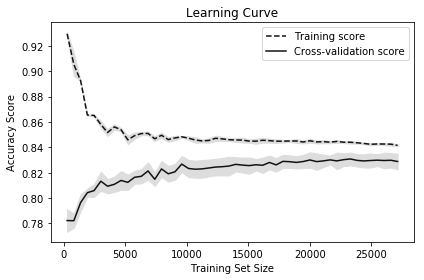

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth=9 ,random_state=1, criterion = 'entropy'), 
                                                        all_features_scaled, 
                                                        all_classes,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [24]:
from datetime import datetime
startTime = datetime.now()

(X_train,
 X_test,
 y_train,
 y_test) = cross_validation.train_test_split(all_features_scaled, all_classes, train_size=0.80, random_state=0)


clf= DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth = 9)

# Train the classifier on the training set
clf.fit(X_train, y_train)
print()
print(datetime.now() - startTime)


0:00:00.059800


In [25]:
clf.score(X_test, y_test)*100

83.22559257417537

In [26]:
clf.fit(X_train, y_train).score(X_train, y_train)

0.8418500559492726

In [27]:
(clf.fit(X_test, y_test).score(X_train, y_train))*100

81.84756931493224

In [28]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

(cv_scores.mean())*100

82.84268929074695

### F1 score for DT

In [29]:
clf_predict_train = clf.predict(X_train)
f1 = (metrics.f1_score(y_train, clf_predict_train, average='weighted'))
print(f1*100)

81.10462897234066


In [30]:
clf_predict_test = clf.predict(X_test)
f1= (metrics.f1_score(y_test, clf_predict_test, average='weighted'))
print(f1*100)

84.847525179858


## training and testing error rates:

Optimal regularization parameter : 0.0034863652276780877


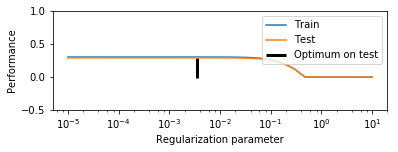

In [31]:
import numpy as np
from sklearn import linear_model

X = all_features_scaled
y = all_classes
# #############################################################################
# Compute train and test errors
alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(X, y).coef_

# #############################################################################
# Plot results functions

import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([-0.5, 1])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

# # Show estimated coef_ vs true coef
# plt.subplot(2, 1, 2)
# plt.plot(coef, label='True coef')
# plt.plot(coef_, label='Estimated coef')
# plt.legend()
# plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
# plt.show()

# Feature importances

In [32]:
!pip install xgboost

You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [33]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators= 10000,
                               random_state =0,
                               n_jobs= -1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_ 
indices= np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("2%d) %-*s %f" %(f+1,30, feat_labels[f], importances[indices[f]]))
    


C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


21) workclass                      0.154620
22) fnlwgt                         0.144822
23) education                      0.137335
24) education_num                  0.126123
25) marital_status                 0.121874
26) occupation                     0.071775
27) relationship                   0.061599
28) race                           0.045128
29) sex                            0.030916
210) capital_gain                   0.026160
211) capital_loss                   0.022927
212) hours_per_week                 0.022645
213) native_country                 0.021177
214) income                         0.012900


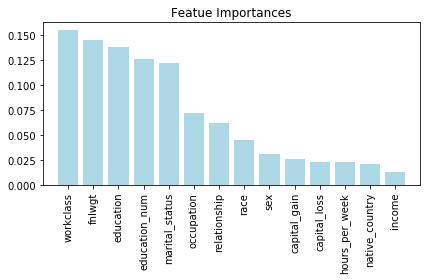

In [34]:
plt.title('Featue Importances')
plt.bar(range(X_train.shape[1]), 
       importances[indices],
       color = 'lightblue',
       align = 'center')
plt.xticks(range(X_train.shape[1]),
          feat_labels, rotation=90)

plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt



model = RandomForestClassifier(50, n_jobs=8)
model.fit(X_train, y_train)
predictions_proba = model.predict_proba(X_test)
predictions = model.predict(X_test)
log_loss_score = log_loss(y_test, predictions_proba)
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')
print('Log loss: %.5f' % log_loss_score)  # 0.72413
print('Acc: %.5f' % acc)  # 0.81601
print('F1: %.5f' % f1)  # 0.81241

Log loss: 0.60080
Acc: 0.82065
F1: 0.81629


In [36]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import log_loss
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score
# from xgboost import XGBClassifier
# import matplotlib.pyplot as plt

# model = XGBClassifier(n_estimators=500)
# model.fit(X_train, y_train)
# feature_importance = model.feature_importances_
# plt.figure(figsize=(16, 6))
# plt.yscale('log', nonposy='clip')
# plt.bar(range(len(feature_importance)), feature_importance, align='center')
# features = list(df) 
# plt.xticks(range(len(feature_importance)), features, rotation='vertical')
# plt.title('Feature importance')
# plt.ylabel('Importance')
# plt.xlabel('Features')
# plt.show()

# https://datawhatnow.com/feature-importance/

In [37]:
# here i am removing the 4 features based on the feature_importances of the above graph but then the cros validation score decreased. 


all_features = df[['workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship'] ]                                                      

all_classes = df['income'].values

feature_names = ['workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship']
                                                       

all_features

,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship
0,6,1,1,13,3,9,4
1,2,1,1,13,1,5,3
2,1,1,4,9,2,7,4
3,1,1,3,7,1,7,3
4,1,2,1,13,1,6,1
5,1,1,11,14,1,5,1
6,1,1,8,5,6,3,4
7,2,1,4,9,1,5,3
8,1,1,11,14,3,6,4
9,1,1,1,13,1,5,3


In [38]:
#Some of our models require the input data to be normalized


from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

array([[ 2.91624496, -0.36609851, -0.98352389, ...,  0.80862449,
         1.09371074,  0.49336392],
       [ 0.18004984, -0.36609851, -0.98352389, ..., -0.89951935,
        -0.24915497, -0.31979688],
       [-0.50399894, -0.36609851, -0.1087154 , ..., -0.04544743,
         0.42227788,  0.49336392],
       ...,
       [-0.50399894, -0.36609851, -0.1087154 , ...,  2.51676833,
         1.09371074,  2.11968553],
       [-0.50399894, -0.36609851, -0.1087154 , ...,  0.80862449,
         1.09371074, -1.13295768],
       [ 0.86409862, -0.36609851, -0.1087154 , ..., -0.89951935,
        -0.24915497, -1.94611848]])

In [39]:
(X_train,
 X_test,
 y_train,
 y_test) = cross_validation.train_test_split(all_features_scaled, all_classes, train_size=0.80, random_state=0)


clf= DecisionTreeClassifier(criterion = 'entropy', random_state=0)

# Train the classifier on the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [40]:
(clf.score(X_test, y_test))*100

81.58461793469253

# Boosting

In [41]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
startTime = datetime.now()



#ada = AdaBoostClassifier(random_state=1)
ada = AdaBoostClassifier(
                         n_estimators=500,
                         learning_rate=0.1,
                         random_state=1)

# Train the classifier on the training set
ada.fit(X_train, y_train)
#clf = clf.fit(X,y)
print((ada.score(X_test, y_test))*100)

print()
print(datetime.now() - startTime)

82.3968175037295

0:00:11.092341


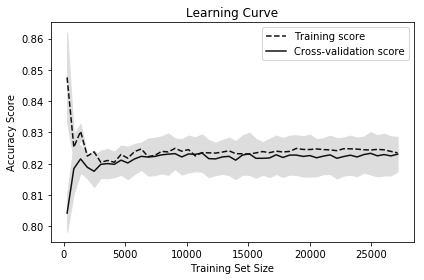

In [42]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(AdaBoostClassifier(random_state=1), 
                                                        all_features_scaled, 
                                                        all_classes,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### F1 score for AdaBoost

In [43]:
ada_predict_train = ada.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.f1_score(y_train, ada_predict_train, average='weighted')))

Accuracy: 0.8101


In [44]:
ada_predict_test = ada.predict(X_test)
f1= (metrics.f1_score(y_test, ada_predict_test, average='weighted'))
print(f1*100)

81.21632567348075


In [45]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

(cv_scores.mean())*100

81.6789137084277

In [46]:
! pip install graphviz

You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Neural Networks


In [74]:
#here resetting all the features to the original list of  features
all_features = df[['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 
                                                      'sex', 'capital_gain', 'capital_loss','hours_per_week','native_country']].values


all_classes = df['income'].values

feature_names = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 
                                                      'sex', 'capital_gain', 'capital_loss','hours_per_week','native_country']

In [75]:
scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.30731813,  2.91624496, -0.36609851, ..., -0.21117066,
        -0.07773411, -0.26867354],
       [ 0.86163755,  0.18004984, -0.36609851, ..., -0.21117066,
        -2.3315307 , -0.26867354],
       [-0.24700129, -0.50399894, -0.36609851, ..., -0.21117066,
        -0.07773411, -0.26867354],
       ...,
       [ 1.41595697, -0.50399894, -0.36609851, ..., -0.21117066,
        -0.07773411, -0.26867354],
       [-1.35564014, -0.50399894, -0.36609851, ..., -0.21117066,
        -1.74721307, -0.26867354],
       [ 0.86163755,  0.86409862, -0.36609851, ..., -0.21117066,
        -0.07773411, -0.26867354]])

In [49]:
#!pip install keras

In [50]:
#!pip install --upgrade tensorflow

In [76]:
(X_train,
 X_test,
 y_train,
 y_test) = cross_validation.train_test_split(all_features_scaled, all_classes, train_size=0.80, random_state=0)

In [52]:

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score
startTime = datetime.now()


def create_model():
    model = Sequential()
    model.add(Dense(5, input_dim=14, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

print(datetime.now() - startTime)

0:00:00


In [53]:
from keras.wrappers.scikit_learn import KerasClassifier

# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model, epochs=2, verbose=0)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator, all_features_scaled, all_classes, cv=10)
print(cv_scores.mean()*100)
print()
print(datetime.now() - startTime)

Using TensorFlow backend.


82.35861726179726

0:00:29.453479


In [54]:
estimator.fit(X_train, y_train)

In [55]:
estimator_predict_test = estimator.predict(X_test)
f1= (metrics.f1_score(y_test, estimator_predict_test, average='weighted'))
print(f1*100)

81.79711980170403


dict_keys(['val_acc', 'acc', 'loss', 'val_loss'])


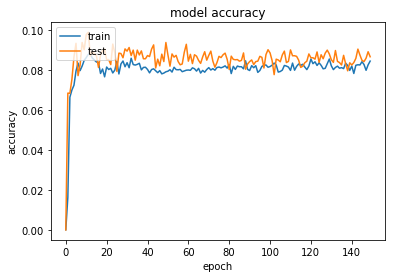

In [56]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed()
# load pima indians dataset
#dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = all_features_scaled
Y = all_classes
# create model
model = Sequential()
model.add(Dense(12, input_dim=14, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

graph description info: https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/

## SVM

In [57]:
(X_train,
 X_test,
 y_train,
 y_test) = cross_validation.train_test_split(all_features_scaled, all_classes, train_size=0.80, random_state=0)

In [58]:
from sklearn import svm
startTime = datetime.now()

C = 1.0
svc = svm.SVC(kernel='linear', C=C)
svc.fit(X_test, y_test)
print(svc.score(X_test, y_test)*100)
print()
print(datetime.now() - startTime)
#http://madhugnadig.com/articles/machine-learning/2017/07/13/support-vector-machine-tutorial-sklearn-algorithm.html

81.78352395159953

0:00:02.715988


In [59]:
svm_predict_test = svc.predict(X_test)
f1 = (metrics.f1_score(y_test, svm_predict_test, average='weighted'))
print(f1*100)

80.68933540176751


In [60]:
# from sklearn import svm
# from sklearn.model_selection import cross_val_score
# from datetime import datetime

# C = 1.0
# svc = svm.SVC(kernel='linear', C=C)


In [61]:
startTime = datetime.now()

cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)

print(cv_scores.mean()*100)
print()
print(datetime.now() - startTime)


82.40175510470777

0:04:55.260738


# Plotting the Learning Curve for SVM with linear Kernel

C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


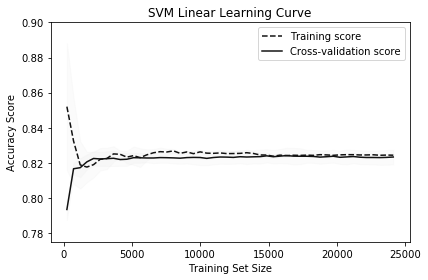

0:08:29.468117


In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

from sklearn.svm import SVC
from datetime import datetime
import matplotlib.pyplot as plt

startTime = datetime.now()

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.01, 1.0, 50)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    #plt.xlabel("Training examples")
    #plt.ylabel("Score")
    
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    
    
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#DDDDDD")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#DDDDDD")
    plt.plot(train_sizes, train_scores_mean, '--', color="#111111",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, color="#111111",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X, y = all_features_scaled, all_classes

title = "SVM Linear Learning Curve"
# SVC is more expensive so we do a lower number of CV iterations:
# I have also tried with 10 splits and got the same graph so for the faster performance i have decided to go with 3 splits.
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
estimator = SVC(kernel='linear')
plot_learning_curve(estimator, title, X, y, (0.775, 0.9), cv=cv, n_jobs=4)

plt.show()
print(datetime.now() - startTime)


# SVM with Sigmoid Kernel

In [63]:
startTime = datetime.now()

C = 1.0
svc = svm.SVC(kernel='sigmoid', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
print(cv_scores.mean()*100)
print()
print(datetime.now() - startTime)


75.86696607625537

0:04:15.328418


In [64]:
svc.fit(X_test, y_test)
print(svc.score(X_test, y_test)*100)

75.12017238521466


In [65]:
svm_sigmoid_predict_test = svc.predict(X_test)
f1=(metrics.f1_score(y_test, svm_sigmoid_predict_test, average='weighted'))
print(f1*100)

74.92747441737347


C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


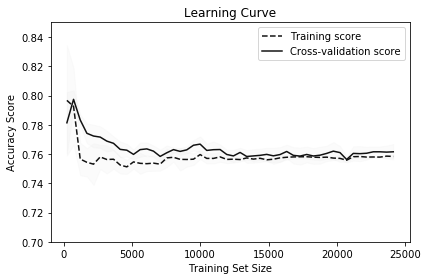

In [66]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

from sklearn.svm import SVC
from datetime import datetime
import matplotlib.pyplot as plt

title = "Learning Curve"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
estimator = SVC(kernel='sigmoid')
plot_learning_curve(estimator, title, X, y, (0.7, 0.85), cv=cv, n_jobs=4)

plt.show()

# SVM with Poly Kernel

In [67]:
startTime = datetime.now()

C = 1.0
svc = svm.SVC(kernel='poly', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
print(cv_scores.mean()*100)
print()
print(datetime.now() - startTime)

82.42497014435038

0:04:32.043617


In [68]:
svc.fit(X_test, y_test)
svc.score(X_test, y_test)

0.8392176363334991

In [69]:
svm_poly_predict_test = svc.predict(X_test)
f1= (metrics.f1_score(y_test, svm_poly_predict_test, average='weighted'))
print(f1*100)

82.57843944208182


C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


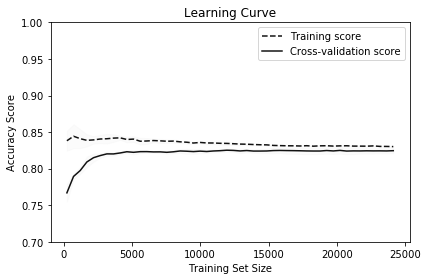

In [70]:
from sklearn.model_selection import ShuffleSplit

title = "Learning Curve"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
#estimator = SVC(kernel='poly')
estimator = svc
plot_learning_curve(estimator, title, X, y, (0.7, 1), cv=cv, n_jobs=4)

plt.show()

## KNN


In [77]:
from sklearn import neighbors
from sklearn.model_selection import ShuffleSplit

startTime = datetime.now()

clf = neighbors.KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

print(cv_scores.mean()*100)
print() 
print(datetime.now() - startTime)

82.056946192566

0:00:25.642390


In [40]:
# cv_scores_list= []
# for n in range(1, 50):
#     clf = neighbors.KNeighborsClassifier(n_neighbors=n)
#     cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
#     cv_scores_list.append(cv_scores.mean())
#    # print (n, cv_scores.mean())
# print (cv_scores_list)

[0.7837682635517298, 0.8015719962351602, 0.8077715364387134, 0.8168230192073086, 0.82056946192566, 0.8240504988107393, 0.821962111784608, 0.8251450479933207, 0.8259079113586937, 0.8271675176581509, 0.826471340924521, 0.8273000996058035, 0.8273997339501774, 0.8284273985809302, 0.8294221376027652, 0.8292893906390868, 0.8294552391446979, 0.8297533838608169, 0.8294550523603059, 0.8286591204299606, 0.829123322445024, 0.8292226379951011, 0.828592510588936, 0.8289574409260014, 0.8284930959913346, 0.8288912268522459, 0.8290898800415324, 0.8295209805292434, 0.8299188804785282, 0.8294879998979731, 0.829056910392862, 0.8287255323071591, 0.8293555607168308, 0.8298528972653678, 0.8296870597788073, 0.8303832693508854, 0.8302174208744347, 0.8300846959342774, 0.8296869058474435, 0.8302835030476375, 0.8288911718371837, 0.8292559483376569, 0.8290901548398178, 0.8289906743320359, 0.8291895584329486, 0.8287254443661671, 0.8283606898454743, 0.8284602912420482, 0.8284935467153447]


In [44]:
# max_element = max(cv_scores_list)


# print(max_element)

# index_of_max = cv_scores_list.index((max_element))+1

# print(index_of_max)

0.8303832693508854
36


C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


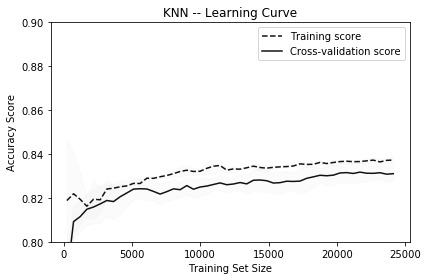

In [78]:
title = "KNN -- Learning Curve"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
estimator = neighbors.KNeighborsClassifier(n_neighbors=36) #or n_neighbors = index_of_max
plot_learning_curve(estimator, title, X, y, (0.8, 0.9), cv=cv, n_jobs=4)

plt.show()

In [79]:
clf.fit(X_test, y_test)
clf.score(X_test, y_test)

0.8670644787004806

In [80]:
clf_predict_test = svc.predict(X_test)
f1=(metrics.f1_score(y_test, clf_predict_test, average='weighted'))
print(f1*100)

82.57843944208182
